In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 400
CHANNELS=3
EPOCHS=42

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantsDisease",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32
)

Found 1322 files belonging to 3 classes.


In [4]:

class_names = train_ds.class_names
class_names

['Healthy', 'Powdery', 'Rust']

In [5]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    

(32, 400, 400, 3)
[2 1 1 0 1 2 2 1 1 1 2 2 0 2 1 0 2 1 0 0 2 0 2 2 2 2 2 1 0 0 2 0]


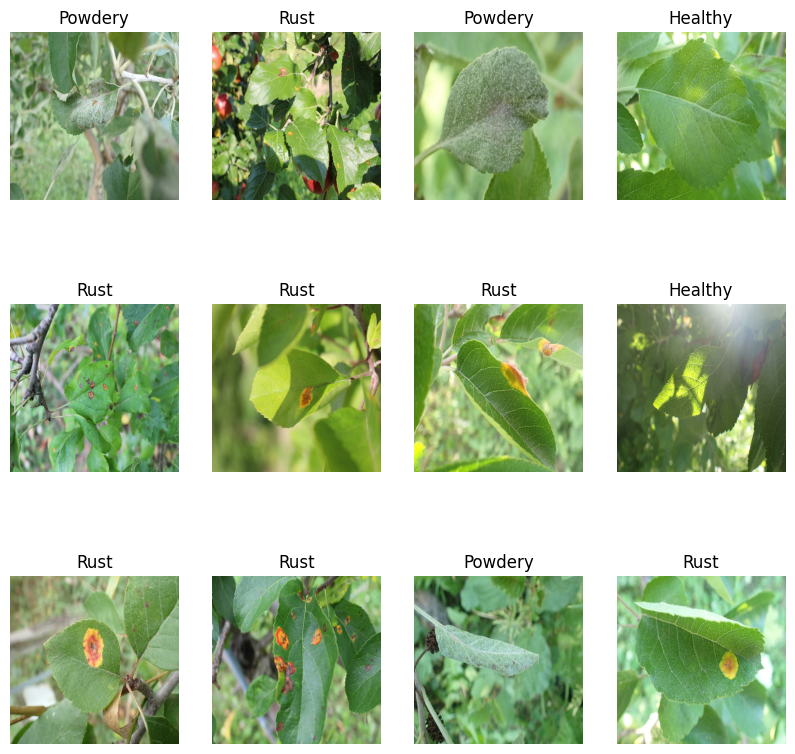

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
    

In [7]:
for image_batch, labels_batch in train_ds.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    

(32, 400, 400, 3)
[1 1 0 1 2 1 2 1 0 2 0 2 0 0 2 1 2 0 2 1 0 2 1 2 1 0 2 2 1 0 2 2]


In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "Test/Test",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 150 files belonging to 3 classes.


In [9]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "Validation/Validation",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32
)

Found 60 files belonging to 3 classes.


In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [12]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.5),
])

In [13]:

train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 400, 400, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 398, 398, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 199, 199, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 197, 197, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 98, 98, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 96, 96, 64)         

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
pd= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=42,
)

Epoch 1/42
42/42 [==============================] - 66s 1s/step - loss: 0.9795 - accuracy: 0.4531 - val_loss: 0.7300 - val_accuracy: 0.5833
Epoch 2/42
42/42 [==============================] - 62s 1s/step - loss: 0.6604 - accuracy: 0.6641 - val_loss: 0.6565 - val_accuracy: 0.6833
Epoch 3/42
42/42 [==============================] - 62s 1s/step - loss: 0.6767 - accuracy: 0.6543 - val_loss: 0.6295 - val_accuracy: 0.6667
Epoch 4/42
42/42 [==============================] - 62s 1s/step - loss: 0.6372 - accuracy: 0.6936 - val_loss: 0.5397 - val_accuracy: 0.7333
Epoch 5/42
42/42 [==============================] - 63s 1s/step - loss: 0.3849 - accuracy: 0.8404 - val_loss: 0.8878 - val_accuracy: 0.9000
Epoch 6/42
42/42 [==============================] - 61s 1s/step - loss: 0.3130 - accuracy: 0.9107 - val_loss: 0.2162 - val_accuracy: 0.9333
Epoch 7/42
42/42 [==============================] - 61s 1s/step - loss: 0.2047 - accuracy: 0.9334 - val_loss: 0.2588 - val_accuracy: 0.9000
Epoch 8/42
42/42 [==

In [18]:
scores = model.evaluate(test_ds)

5/5 [==============================] - 2s 293ms/step - loss: 0.2743 - accuracy: 0.9400


In [19]:

scores


[0.2742772102355957, 0.9399999976158142]

first image to predict
actual label: Healthy
1/1 [==============================] - 0s 287ms/step
predicted label: Healthy
first image to predict
actual label: Rust
1/1 [==============================] - 0s 290ms/step
predicted label: Rust
first image to predict
actual label: Powdery
1/1 [==============================] - 0s 286ms/step
predicted label: Powdery
first image to predict
actual label: Healthy
1/1 [==============================] - 0s 216ms/step
predicted label: Healthy
first image to predict
actual label: Healthy
1/1 [==============================] - 0s 290ms/step
predicted label: Healthy


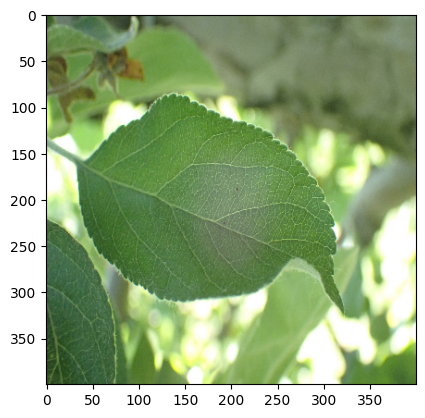